In [1]:
import os
import librosa
import pandas as pd
import soundfile as sf
from datasets import Dataset
from tqdm.notebook import tqdm_notebook as tqdm

In [2]:
full_dataset = pd.DataFrame(columns=['path', 'sentence'])

In [3]:
path_common_voice = 'datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpus-13.0-2023-03-09/pt'
path_fala_brasil = 'datasets/FalaBrasil'
path_mls_portuguese = 'datasets/mls_portuguese'
path_vox_forge = 'datasets/VoxForge'
path_tts_portuguese = 'datasets/TTS-Portuguese-Corpus'
path_custom_dataset = 'datasets/custom_dataset'

## Common Voice

Arquivo "validated.tsv" possui todos aúdios com no mínimo 2 avaliações e com "up_votes" > "down_votes"

In [4]:
df_validated = pd.read_csv(f'{path_common_voice}/validated.tsv', sep='\t')

In [5]:
len(df_validated)

130992

In [6]:
df_validated

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,02de1a21ad910b71b327f73a6f11710125032966756c2d...,common_voice_pt_36374566.mp3,Que pena!,2,0,twenties,male,NaN,Portuguese (Brasil),pt,NaN
1,0505787412472a5e134ebdb81c0295a24c18edf7df8e23...,common_voice_pt_36094300.mp3,Mas foi tudo vão.,2,0,NaN,NaN,NaN,NaN,pt,NaN
2,05250d1f57b5c33e3413a8987c6c15d2dfbcf1479d4647...,common_voice_pt_27809231.mp3,"É necessário fornecer, quando formulado, uma a...",2,0,NaN,NaN,NaN,NaN,pt,NaN
3,07f310f0cc039ba964ea9c79e060ca7dee1abf0483339d...,common_voice_pt_36864335.mp3,testamento,2,0,fourties,male,NaN,Portuguese (Brasil),pt,NaN
4,0879dba58b82167a9107c0b1c9d86d0bcf112a0602906b...,common_voice_pt_34082686.mp3,Bolo é uma mentira.,2,0,NaN,NaN,NaN,NaN,pt,NaN
...,...,...,...,...,...,...,...,...,...,...,...
130987,d8288aee86a2a6a3ab6f3e8d4028ef097b51698b2f7392...,common_voice_pt_36704044.mp3,Um golden retriever que anda através da grama ...,4,0,twenties,male,Candango,Portuguese (Brasil),pt,NaN
130988,d8288aee86a2a6a3ab6f3e8d4028ef097b51698b2f7392...,common_voice_pt_36704075.mp3,"Depois de um tempo, eles cedem e se retiram pa...",4,0,twenties,male,Candango,Portuguese (Brasil),pt,NaN
130989,d8288aee86a2a6a3ab6f3e8d4028ef097b51698b2f7392...,common_voice_pt_36704077.mp3,Examinei o poder legislativo e o poder executi...,2,0,twenties,male,Candango,Portuguese (Brasil),pt,NaN
130990,d8288aee86a2a6a3ab6f3e8d4028ef097b51698b2f7392...,common_voice_pt_36704081.mp3,instrumentos odiados da repressora ditadura mi...,2,0,twenties,male,Candango,Portuguese (Brasil),pt,NaN


Neste dataset existem pessoas do Brasil e de Portugual. Como o objetivo aqui é entender português (Brasil), vou pegar somente dados que estão classificados como "Portuguese (Brasil)"

In [7]:
df_validated['variant'].value_counts()

variant
Portuguese (Brasil)      40120
Portuguese (Portugal)      855
Name: count, dtype: int64

In [8]:
df_validated_clenead = df_validated[df_validated['variant'] == 'Portuguese (Brasil)']

In [9]:
print(len(df_validated_clenead))
print(df_validated_clenead['variant'].unique())

40120
['Portuguese (Brasil)']


Algumas linhas estão incorretas, então remove elas

In [10]:
for idx in df_validated_clenead[df_validated_clenead['sentence'].str.contains('common_voice')].index:
    df_validated_clenead = df_validated_clenead.drop(idx)

Pega somente as colunas relevantes e adiciona o caminho completo

In [11]:
df_validated_clenead = df_validated_clenead[['path', 'sentence']]

In [12]:
df_validated_clenead['path'] = f'{path_common_voice}/clips/' + df_validated_clenead['path']
df_validated_clenead

,path,sentence
0,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Que pena!
3,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,testamento
7,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Unidade popular pelo socialismo
47,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Eu estou indo para o negócio por mim mesmo.
52,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,lacuna
...,...,...
130987,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Um golden retriever que anda através da grama ...
130988,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,"Depois de um tempo, eles cedem e se retiram pa..."
130989,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Examinei o poder legislativo e o poder executi...
130990,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,instrumentos odiados da repressora ditadura mi...


In [13]:
full_dataset = pd.concat([full_dataset, df_validated_clenead], ignore_index=True)
full_dataset

,path,sentence
0,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Que pena!
1,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,testamento
2,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Unidade popular pelo socialismo
3,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Eu estou indo para o negócio por mim mesmo.
4,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,lacuna
...,...,...
40111,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Um golden retriever que anda através da grama ...
40112,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,"Depois de um tempo, eles cedem e se retiram pa..."
40113,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Examinei o poder legislativo e o poder executi...
40114,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,instrumentos odiados da repressora ditadura mi...


## Fala Brasil

In [14]:
def get_sentence(path, filename_wav):
    file_id = filename_wav[:filename_wav.rfind('.')]
    with open(f'{path}/{file_id}.txt') as f:
        lines = f.readlines()
        sentence = ''
        for line in lines:
            sentence += line.replace('\n', ' ')
        sentence = sentence.strip()
    return sentence

In [15]:
dataset_fala_brasil = []
for folder in os.listdir(path_fala_brasil):
    full_path = f'{path_fala_brasil}/{folder}'
    for inside_folder in os.listdir(full_path):
        if os.path.isdir(f'{full_path}/{inside_folder}'):
            full_path2 = f'{full_path}/{inside_folder}'
            for inside_folder_again in os.listdir(full_path2):
                if inside_folder_again.endswith('.wav'):
                    dataset_fala_brasil.append([f'{full_path2}/{inside_folder_again}', get_sentence(full_path2, inside_folder_again)])
        else:
            if inside_folder.endswith('.wav'):
                dataset_fala_brasil.append([f'{full_path}/{inside_folder}', get_sentence(full_path, inside_folder)])

In [16]:
df_dataset_fala_brasil = pd.DataFrame(dataset_fala_brasil, columns=['path', 'sentence'])
df_dataset_fala_brasil

,path,sentence
0,datasets/FalaBrasil/codigodefesaconsumidor16k-...,artigo segundo consumidor é toda pessoa física...
1,datasets/FalaBrasil/codigodefesaconsumidor16k-...,inciso cinco soma total a pagar com e sem fina...
2,datasets/FalaBrasil/codigodefesaconsumidor16k-...,parágrafo quarto é facultado a qualquer consum...
3,datasets/FalaBrasil/codigodefesaconsumidor16k-...,capítulo dois da política nacional de relações...
4,datasets/FalaBrasil/codigodefesaconsumidor16k-...,parágrafo segundo a nulidade de uma cláusula c...
...,...,...
105377,datasets/FalaBrasil/lapsbm16k-master/LapsBM-M0...,parece que estamos torcendo pelos estados unid...
105378,datasets/FalaBrasil/lapsbm16k-master/LapsBM-M0...,o primeiro pavimento seria destinado à residên...
105379,datasets/FalaBrasil/lapsbm16k-master/LapsBM-M0...,as duas análises apontam quais as praias do mu...
105380,datasets/FalaBrasil/lapsbm16k-master/LapsBM-M0...,o melhor resultado foi registrado na região me...


In [17]:
full_dataset = pd.concat([full_dataset, df_dataset_fala_brasil], ignore_index=True)
full_dataset

,path,sentence
0,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Que pena!
1,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,testamento
2,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Unidade popular pelo socialismo
3,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Eu estou indo para o negócio por mim mesmo.
4,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,lacuna
...,...,...
145493,datasets/FalaBrasil/lapsbm16k-master/LapsBM-M0...,parece que estamos torcendo pelos estados unid...
145494,datasets/FalaBrasil/lapsbm16k-master/LapsBM-M0...,o primeiro pavimento seria destinado à residên...
145495,datasets/FalaBrasil/lapsbm16k-master/LapsBM-M0...,as duas análises apontam quais as praias do mu...
145496,datasets/FalaBrasil/lapsbm16k-master/LapsBM-M0...,o melhor resultado foi registrado na região me...


## Multilingual LibriSpeech (MLS) - MLS Portuguese

In [18]:
dataset_mls_portuguese = []
for folder in [f'{path_mls_portuguese}/train', f'{path_mls_portuguese}/dev', f'{path_mls_portuguese}/test']:
    transcripts = pd.read_csv(f'{folder}/transcripts.txt', sep='\t', header=None)
    for inside_folder_audio in os.listdir(f'{folder}/audio'):
        # Ignore Portugal speakers
        if inside_folder_audio in ['533', '3037', '3718', '4000', '4341', '6187', '7407',
                                  '12428', '13196', '6549', '9056']:
            continue
        # TODO: Jump Portugal speakears
        #if inside_folder_audio in ['']:
        #    continue
        for inside_folder_speaker in os.listdir(f'{folder}/audio/{inside_folder_audio}'):
            for filename in os.listdir(f'{folder}/audio/{inside_folder_audio}/{inside_folder_speaker}'):
                full_path = f'{folder}/audio/{inside_folder_audio}/{inside_folder_speaker}/{filename}'
                #print(full_path)
                file_id = filename[:filename.rfind('.')]
                file_data = transcripts.loc[transcripts[0] == file_id]
                if len(file_data) > 0:
                    sentence = file_data[1].array[0]
                    dataset_mls_portuguese.append([full_path, sentence])
                else:
                    print(full_path)

In [19]:
df_dataset_mls_portuguese = pd.DataFrame(dataset_mls_portuguese, columns=['path', 'sentence'])
df_dataset_mls_portuguese

,path,sentence
0,datasets/mls_portuguese/train/audio/9958/6390/...,no dia seguinte veio o veado capinou e roçou o...
1,datasets/mls_portuguese/train/audio/9958/6390/...,deixa-me que os marimbondos estão me matando e...
2,datasets/mls_portuguese/train/audio/9958/6390/...,o veado a levou para casa e disse á sua compan...
3,datasets/mls_portuguese/train/audio/9958/6390/...,estando o coelho dormindo veio o macaco e puxo...
4,datasets/mls_portuguese/train/audio/9958/6390/...,foi caçar matou um veado muito grande trouxe p...
...,...,...
38966,datasets/mls_portuguese/test/audio/4405/3648/4...,aconteceu que o novais apanhou um resfriado e ...
38967,datasets/mls_portuguese/test/audio/4405/3648/4...,cruzou as mãos sobre o ventre atirou olhar pel...
38968,datasets/mls_portuguese/test/audio/4405/3648/4...,o caixeiro pensou e pensou bem não ser coisa m...
38969,datasets/mls_portuguese/test/audio/4405/3648/4...,o conselheiro lapa era casado e tinha uma filh...


In [20]:
full_dataset = pd.concat([full_dataset, df_dataset_mls_portuguese], ignore_index=True)
full_dataset

,path,sentence
0,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Que pena!
1,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,testamento
2,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Unidade popular pelo socialismo
3,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Eu estou indo para o negócio por mim mesmo.
4,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,lacuna
...,...,...
184464,datasets/mls_portuguese/test/audio/4405/3648/4...,aconteceu que o novais apanhou um resfriado e ...
184465,datasets/mls_portuguese/test/audio/4405/3648/4...,cruzou as mãos sobre o ventre atirou olhar pel...
184466,datasets/mls_portuguese/test/audio/4405/3648/4...,o caixeiro pensou e pensou bem não ser coisa m...
184467,datasets/mls_portuguese/test/audio/4405/3648/4...,o conselheiro lapa era casado e tinha uma filh...


## VoxForge

In [21]:
dataset_vox_forge = []
for inside_folder_speaker in os.listdir(path_vox_forge):
    full_path = f'{path_vox_forge}/{inside_folder_speaker}'
    if not os.path.exists(f'{full_path}/etc'):
        for inside_folder_speaker2 in os.listdir(full_path):
            if os.path.exists(f'{full_path}/{inside_folder_speaker2}/etc'):
                full_path += f'/{inside_folder_speaker2}'
                break
    with open(f'{full_path}/etc/README') as f:
        for line in f.readlines():
            start_pos = line.find('Pronunciation dialect:')
            if start_pos != -1:
                pronunciation = line[start_pos+23:-1]
                break
    with open(f'{full_path}/etc/prompts-original') as f:
        for line in f.readlines():
            file_id = line[:line.find(' ')]
            sentence = line[line.find(' ')+1:-1]
            path_wav = f'{full_path}/wav/{file_id}.wav'
            if not os.path.exists(path_wav):
                #print(path_wav)
                continue
            dataset_vox_forge.append([path_wav, sentence, pronunciation])

In [22]:
df_dataset_vox_forge_temp = pd.DataFrame(dataset_vox_forge)
df_dataset_vox_forge_temp

,0,1,2
0,datasets/VoxForge/medeiros405-20090425-aoz/wav...,Eu pago a conta e vocês deixam a gorjeta.,Português Brasileiro
1,datasets/VoxForge/medeiros405-20090425-aoz/wav...,Eu e Pedro andamos a cavalo nos sábados.,Português Brasileiro
2,datasets/VoxForge/medeiros405-20090425-aoz/wav...,"Na festa, todo mundo estava muito contente.",Português Brasileiro
3,datasets/VoxForge/medeiros405-20090425-aoz/wav...,Meu pai tem que fazer escala no Rio de Janeiro.,Português Brasileiro
4,datasets/VoxForge/medeiros405-20090425-aoz/wav...,"Quando eu era criança, não gostava de morangos.",Português Brasileiro
...,...,...,...
4565,datasets/VoxForge/Fabiano-20110905-gpk/wav/137...,Quero que vocês me visitem,Portugês do Brasil
4566,datasets/VoxForge/Fabiano-20110905-gpk/wav/138...,Não se preocupe.,Portugês do Brasil
4567,datasets/VoxForge/Fabiano-20110905-gpk/wav/139...,Vende-se pão na esquina.,Portugês do Brasil
4568,datasets/VoxForge/Fabiano-20110905-gpk/wav/140...,Fala-se português em Moçambique.,Portugês do Brasil


In [23]:
df_dataset_vox_forge_temp[2].value_counts()

2
Portugês do Brasil      3431
Português Brasileiro     710
Portugês de Portugal     209
desconhecido              90
Outro                     90
Selecione                 20
Other                     20
Name: count, dtype: int64

In [24]:
df_dataset_vox_forge = pd.concat([df_dataset_vox_forge_temp[df_dataset_vox_forge_temp[2] == 'Portugês do Brasil'], df_dataset_vox_forge_temp[df_dataset_vox_forge_temp[2] == 'Português Brasileiro']])
df_dataset_vox_forge

,0,1,2
10,datasets/VoxForge/insinfo-20120622-lio/wav/012...,Nós desejamos um quarto com ar condicionado.,Portugês do Brasil
11,datasets/VoxForge/insinfo-20120622-lio/wav/013...,"Esta comida é ruim, mas aquela é pior.",Portugês do Brasil
12,datasets/VoxForge/insinfo-20120622-lio/wav/014...,Tem muitos pingüins no zoológico.,Portugês do Brasil
13,datasets/VoxForge/insinfo-20120622-lio/wav/015...,Quando foi fundada a Academia Militar?,Portugês do Brasil
14,datasets/VoxForge/insinfo-20120622-lio/wav/016...,Meu filho é advogado.,Portugês do Brasil
...,...,...,...
4556,datasets/VoxForge/JosAugusto-20081121-jii/wav/...,Procuro um apartamento com móveis.,Português Brasileiro
4557,datasets/VoxForge/JosAugusto-20081121-jii/wav/...,"Se eu tivesse dinheiro, eu viajaria pelo mundo...",Português Brasileiro
4558,datasets/VoxForge/JosAugusto-20081121-jii/wav/...,Houve um acidente grave na rodovia.,Português Brasileiro
4559,datasets/VoxForge/JosAugusto-20081121-jii/wav/...,É importante ter mais tempo.,Português Brasileiro


In [25]:
df_dataset_vox_forge = df_dataset_vox_forge[[0, 1]]
df_dataset_vox_forge = df_dataset_vox_forge.rename(columns={0: 'path', 1: 'sentence'})

In [26]:
full_dataset = pd.concat([full_dataset, df_dataset_vox_forge], ignore_index=True)
full_dataset

,path,sentence
0,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Que pena!
1,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,testamento
2,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Unidade popular pelo socialismo
3,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Eu estou indo para o negócio por mim mesmo.
4,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,lacuna
...,...,...
188605,datasets/VoxForge/JosAugusto-20081121-jii/wav/...,Procuro um apartamento com móveis.
188606,datasets/VoxForge/JosAugusto-20081121-jii/wav/...,"Se eu tivesse dinheiro, eu viajaria pelo mundo..."
188607,datasets/VoxForge/JosAugusto-20081121-jii/wav/...,Houve um acidente grave na rodovia.
188608,datasets/VoxForge/JosAugusto-20081121-jii/wav/...,É importante ter mais tempo.


## TTS Portuguese Corpus

In [27]:
df_dataset_tts_portuguese = pd.read_csv(f'{path_tts_portuguese}/texts.csv', header=None, sep='==')
df_dataset_tts_portuguese = df_dataset_tts_portuguese.rename(columns={0: 'path', 1: 'sentence'})
df_dataset_tts_portuguese

/tmp/ipykernel_15868/857569029.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_dataset_tts_portuguese = pd.read_csv(f'{path_tts_portuguese}/texts.csv', header=None, sep='==')


,path,sentence
0,wavs/sample-0.wav,O título de página solicitado contém carateres...
1,wavs/sample-1.wav,"O academicismo ou academismo designam, origina..."
2,wavs/sample-2.wav,Esse método estendeu sua influência sobre todo...
3,wavs/sample-3.wav,"No entanto, os termos não têm uma aplicação co..."
4,wavs/sample-5.wav,O sucesso da proposta francesa a tornou um mod...
...,...,...
3620,wavs/sample-6713.wav,"Tendo uma paixão pelo hip hop, a artista fico..."
3621,wavs/sample-6717.wav,As vendas digitais da faixa ultrapassaram a m...
3622,wavs/sample-6723.wav,O financiamento da ação externa da União Euro...
3623,wavs/sample-6727.wav,As avaliações económicas dos tratamentos atua...


In [28]:
df_dataset_tts_portuguese['path'] = f'{path_tts_portuguese}/' + df_dataset_tts_portuguese["path"]
df_dataset_tts_portuguese

,path,sentence
0,datasets/TTS-Portuguese-Corpus/wavs/sample-0.wav,O título de página solicitado contém carateres...
1,datasets/TTS-Portuguese-Corpus/wavs/sample-1.wav,"O academicismo ou academismo designam, origina..."
2,datasets/TTS-Portuguese-Corpus/wavs/sample-2.wav,Esse método estendeu sua influência sobre todo...
3,datasets/TTS-Portuguese-Corpus/wavs/sample-3.wav,"No entanto, os termos não têm uma aplicação co..."
4,datasets/TTS-Portuguese-Corpus/wavs/sample-5.wav,O sucesso da proposta francesa a tornou um mod...
...,...,...
3620,datasets/TTS-Portuguese-Corpus/wavs/sample-671...,"Tendo uma paixão pelo hip hop, a artista fico..."
3621,datasets/TTS-Portuguese-Corpus/wavs/sample-671...,As vendas digitais da faixa ultrapassaram a m...
3622,datasets/TTS-Portuguese-Corpus/wavs/sample-672...,O financiamento da ação externa da União Euro...
3623,datasets/TTS-Portuguese-Corpus/wavs/sample-672...,As avaliações económicas dos tratamentos atua...


In [29]:
full_dataset = pd.concat([full_dataset, df_dataset_tts_portuguese], ignore_index=True)
full_dataset

,path,sentence
0,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Que pena!
1,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,testamento
2,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Unidade popular pelo socialismo
3,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Eu estou indo para o negócio por mim mesmo.
4,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,lacuna
...,...,...
192230,datasets/TTS-Portuguese-Corpus/wavs/sample-671...,"Tendo uma paixão pelo hip hop, a artista fico..."
192231,datasets/TTS-Portuguese-Corpus/wavs/sample-671...,As vendas digitais da faixa ultrapassaram a m...
192232,datasets/TTS-Portuguese-Corpus/wavs/sample-672...,O financiamento da ação externa da União Euro...
192233,datasets/TTS-Portuguese-Corpus/wavs/sample-672...,As avaliações económicas dos tratamentos atua...


## Custom Dataset

In [30]:
df = pd.read_csv(f'{path_custom_dataset}/annotation.tsv', sep='\t')

In [31]:
new_custom_dataset = []
for row in df.values:
    filename = row[0][row[0].rfind('/')+1:]
    new_custom_dataset.append([f'{path_custom_dataset}/audio/{filename}', row[1]])

In [32]:
df_custom_dataset = pd.DataFrame(new_custom_dataset)
df_custom_dataset = df_custom_dataset.rename(columns={0: 'path', 1: 'sentence'})
df_custom_dataset

,path,sentence
0,datasets/custom_dataset/audio/0.wav,O linho estava em flor.
1,datasets/custom_dataset/audio/1.wav,"Com as mais lindas flores azuis, tão suaves e ..."
2,datasets/custom_dataset/audio/2.wav,quem sabe até mais.
3,datasets/custom_dataset/audio/3.wav,O sol brilhava sobre o linho e as nuvens de ch...
4,datasets/custom_dataset/audio/4.wav,era tão bom para ele quanto para as crianças p...
...,...,...
3785,datasets/custom_dataset/audio/3785.wav,"Assim, acabou morrendo ali mesmo, com o rosto ..."
3786,datasets/custom_dataset/audio/3786.wav,"Esse foi o castigo do belo Narciso, cujo desti..."
3787,datasets/custom_dataset/audio/3787.wav,"Eco ficou chorando ao lado do corpo dele, até ..."
3788,datasets/custom_dataset/audio/3788.wav,"Ao despertar, Eco viu que Narciso não estava m..."


In [33]:
full_dataset = pd.concat([full_dataset, df_custom_dataset], ignore_index=True)
full_dataset

,path,sentence
0,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Que pena!
1,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,testamento
2,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Unidade popular pelo socialismo
3,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Eu estou indo para o negócio por mim mesmo.
4,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,lacuna
...,...,...
196020,datasets/custom_dataset/audio/3785.wav,"Assim, acabou morrendo ali mesmo, com o rosto ..."
196021,datasets/custom_dataset/audio/3786.wav,"Esse foi o castigo do belo Narciso, cujo desti..."
196022,datasets/custom_dataset/audio/3787.wav,"Eco ficou chorando ao lado do corpo dele, até ..."
196023,datasets/custom_dataset/audio/3788.wav,"Ao despertar, Eco viu que Narciso não estava m..."


## Remove problemas no dataset

Printa os caminhos que não existe o arquivo (se não printar nada, significa que está tudo ok) e marca para serem removidos do dataset

In [34]:
for idx, path in enumerate(full_dataset['path']):
    if not os.path.exists(path):
        print(idx, path)
        full_dataset.loc[idx, 'sentence'] = None

189449 datasets/TTS-Portuguese-Corpus/wavs/sample-848.wav


Remove sentenças em branco

In [35]:
full_dataset[full_dataset['sentence'] == ''].count()

path        122
sentence    122
dtype: int64

In [36]:
full_dataset[full_dataset['sentence'] == ''] = None
full_dataset = full_dataset.dropna(subset='sentence')
full_dataset

,path,sentence
0,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Que pena!
1,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,testamento
2,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Unidade popular pelo socialismo
3,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Eu estou indo para o negócio por mim mesmo.
4,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,lacuna
...,...,...
196020,datasets/custom_dataset/audio/3785.wav,"Assim, acabou morrendo ali mesmo, com o rosto ..."
196021,datasets/custom_dataset/audio/3786.wav,"Esse foi o castigo do belo Narciso, cujo desti..."
196022,datasets/custom_dataset/audio/3787.wav,"Eco ficou chorando ao lado do corpo dele, até ..."
196023,datasets/custom_dataset/audio/3788.wav,"Ao despertar, Eco viu que Narciso não estava m..."


## Salva dataset

Armazena em uma nova coluna o tempo de cada áudio

In [37]:
all_times = []
for path in tqdm(full_dataset['path']):
    all_times.append(librosa.get_duration(path=path))
full_dataset['time'] = all_times

  0%|          | 0/195902 [00:00<?, ?it/s]

/tmp/ipykernel_15868/2254192654.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset['time'] = all_times


In [38]:
full_dataset

,path,sentence,time
0,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Que pena!,2.0955
1,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,testamento,2.8155
2,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Unidade popular pelo socialismo,3.8955
3,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Eu estou indo para o negócio por mim mesmo.,3.2835
4,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,lacuna,2.2755
...,...,...,...
196020,datasets/custom_dataset/audio/3785.wav,"Assim, acabou morrendo ali mesmo, com o rosto ...",6.3600
196021,datasets/custom_dataset/audio/3786.wav,"Esse foi o castigo do belo Narciso, cujo desti...",6.3600
196022,datasets/custom_dataset/audio/3787.wav,"Eco ficou chorando ao lado do corpo dele, até ...",5.4900
196023,datasets/custom_dataset/audio/3788.wav,"Ao despertar, Eco viu que Narciso não estava m...",7.1700


In [39]:
full_dataset.to_csv('datasets/dataset.tsv', sep='\t', index=False)

# Limpar dataset

In [40]:
from datasets import Dataset, DatasetDict, load_dataset
import re

In [41]:
pd_dataset_dict = pd.read_csv('datasets/dataset.tsv', sep='\t')
pd_dataset_dict

,path,sentence,time
0,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Que pena!,2.0955
1,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,testamento,2.8155
2,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Unidade popular pelo socialismo,3.8955
3,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,Eu estou indo para o negócio por mim mesmo.,3.2835
4,datasets/cv-corpus-13.0-2023-03-09-pt/cv-corpu...,lacuna,2.2755
...,...,...,...
195897,datasets/custom_dataset/audio/3785.wav,"Assim, acabou morrendo ali mesmo, com o rosto ...",6.3600
195898,datasets/custom_dataset/audio/3786.wav,"Esse foi o castigo do belo Narciso, cujo desti...",6.3600
195899,datasets/custom_dataset/audio/3787.wav,"Eco ficou chorando ao lado do corpo dele, até ...",5.4900
195900,datasets/custom_dataset/audio/3788.wav,"Ao despertar, Eco viu que Narciso não estava m...",7.1700


## Remover áudios muito grande
Por mais que exista o parâmetro "max_input_length" no treinamento do código do Wav2Vec2, é interessante limpar o que não for utilizado, até porque ao fazer o preprocessing ele ocupa espaço em disco.

In [42]:
pd_dataset_dict['time'].sort_values()

192742     0.600000
189247     0.670000
189244     0.670000
189365     0.710000
189359     0.710000
            ...    
118589    42.579563
40123     43.206500
189700    50.080000
40248     57.388875
40242     77.061250
Name: time, Length: 195902, dtype: float64

In [43]:
ranges_time = []
ranges_time.append(pd_dataset_dict['time'].between(0, 5, inclusive='left').sum())
ranges_time.append(pd_dataset_dict['time'].between(5, 10, inclusive='left').sum())
ranges_time.append(pd_dataset_dict['time'].between(10, 15, inclusive='left').sum())
ranges_time.append(pd_dataset_dict['time'].between(15, 20, inclusive='left').sum())
ranges_time.append(pd_dataset_dict['time'].between(20, 25, inclusive='left').sum())
ranges_time.append(pd_dataset_dict['time'].between(25, 30, inclusive='left').sum())
ranges_time.append((pd_dataset_dict['time'] >= 30).sum())

[Text(0, 0, '94916'),
 Text(0, 0, '58107'),
 Text(0, 0, '19795'),
 Text(0, 0, '17116'),
 Text(0, 0, '4986'),
 Text(0, 0, '629'),
 Text(0, 0, '353')]

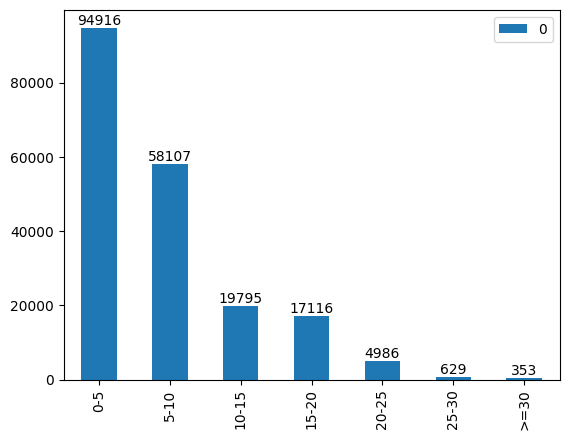

In [44]:
cat_time = pd.DataFrame(ranges_time, index=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '>=30'])
ax = cat_time.plot.bar()
ax.bar_label(ax.containers[0])

Remover todos audios maior ou igual a 20 segundos

In [45]:
pd_dataset_dict.loc[pd_dataset_dict['time'] >= 20, 'sentence'] = None
pd_dataset_dict = pd_dataset_dict.dropna(subset='sentence')

## Tratar vocabulário

In [46]:
dataset_dict = DatasetDict()
dataset_dict['dataset'] = Dataset.from_pandas(pd_dataset_dict)

In [47]:
def extract_all_chars(batch):
    try:
        all_text = " ".join(batch["sentence"])
    except Exception as e:
        print(batch['sentence'])
        raise ValueError()
        
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}

Vocabulário antes de limpar

In [48]:
vocabs = dataset_dict.map(extract_all_chars, batched=True, batch_size=-1, keep_in_memory=True, remove_columns=dataset_dict.column_names['dataset'])
vocab_list = list(set(vocabs["dataset"]["vocab"][0]))

vocab_dict = {v: k for k, v in enumerate(sorted(vocab_list))}
vocab_dict

Map:   0%|          | 0/189934 [00:00<?, ? examples/s]

{' ': 0,
 '!': 1,
 '"': 2,
 '&': 3,
 "'": 4,
 '(': 5,
 ')': 6,
 ',': 7,
 '-': 8,
 '.': 9,
 '/': 10,
 '0': 11,
 '2': 12,
 '3': 13,
 '4': 14,
 '5': 15,
 ':': 16,
 ';': 17,
 '?': 18,
 'A': 19,
 'B': 20,
 'C': 21,
 'D': 22,
 'E': 23,
 'F': 24,
 'G': 25,
 'H': 26,
 'I': 27,
 'J': 28,
 'K': 29,
 'L': 30,
 'M': 31,
 'N': 32,
 'O': 33,
 'P': 34,
 'Q': 35,
 'R': 36,
 'S': 37,
 'T': 38,
 'U': 39,
 'V': 40,
 'W': 41,
 'X': 42,
 'Y': 43,
 'Z': 44,
 ']': 45,
 'a': 46,
 'b': 47,
 'c': 48,
 'd': 49,
 'e': 50,
 'f': 51,
 'g': 52,
 'h': 53,
 'i': 54,
 'j': 55,
 'k': 56,
 'l': 57,
 'm': 58,
 'n': 59,
 'o': 60,
 'p': 61,
 'q': 62,
 'r': 63,
 's': 64,
 't': 65,
 'u': 66,
 'v': 67,
 'w': 68,
 'x': 69,
 'y': 70,
 'z': 71,
 '\xa0': 72,
 '«': 73,
 '´': 74,
 '·': 75,
 '»': 76,
 'À': 77,
 'Á': 78,
 'Â': 79,
 'É': 80,
 'Í': 81,
 'Ó': 82,
 'Ô': 83,
 'Ú': 84,
 'à': 85,
 'á': 86,
 'â': 87,
 'ã': 88,
 'ç': 89,
 'é': 90,
 'ê': 91,
 'í': 92,
 'ò': 93,
 'ó': 94,
 'ô': 95,
 'õ': 96,
 'ú': 97,
 'ü': 98,
 'ı': 99,
 'š': 1

Limpeza do dados, removendo caracteres e sentenças que não são fáceis de identificar em áudios

In [49]:
chars_to_ignore_regex = '[\,\?\.\!\;\:\"\“\%\‘\”\’\(\)\[\]\«\»\·]'
chars_to_replace = {
    "&": 'e',
    '/': ' ',
    '´': "'",
    'ü': 'u',
    '– ': ''
}
# Remove sentence when there is the follow characters
chars_to_remove = ['ı', 'š', 'ž', '\xa0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def remove_special_characters(batch):
    batch["sentence"] = re.sub(chars_to_ignore_regex, '', batch["sentence"]).lower()
    for key, value in chars_to_replace.items():
        batch["sentence"] = batch["sentence"].replace(key, value)
    
    # Remove multiple spaces
    batch['sentence'] = " ".join(batch['sentence'].split())
    
    for char_to_remove in chars_to_remove:
        if batch['sentence'].find(char_to_remove) != -1:
            batch['sentence'] = None
            break
    
    # Can change the "find" to parse sentences with the character
    if batch['sentence'] and batch['sentence'].find('·') != -1:
        print(batch)
    return batch

In [50]:
dataset_dict2 = dataset_dict.map(remove_special_characters)
# Remove None values
dataset_dict2['dataset'] = Dataset.from_pandas(pd.DataFrame(dataset_dict2['dataset'], columns=['path', 'sentence', 'time']).dropna(subset='sentence')).remove_columns(["__index_level_0__"])

Map:   0%|          | 0/189934 [00:00<?, ? examples/s]

Vocabulário final

**Atenção:** Precisa cuidar para ter todos os principais caracteres do idioma

In [51]:
vocabs = dataset_dict2.map(extract_all_chars, batched=True, batch_size=-1, keep_in_memory=True, remove_columns=dataset_dict2.column_names['dataset'])
vocab_list = list(set(vocabs["dataset"]["vocab"][0]))

vocab_dict = {v: k for k, v in enumerate(sorted(vocab_list))}
vocab_dict

Map:   0%|          | 0/189921 [00:00<?, ? examples/s]

{' ': 0,
 "'": 1,
 '-': 2,
 'a': 3,
 'b': 4,
 'c': 5,
 'd': 6,
 'e': 7,
 'f': 8,
 'g': 9,
 'h': 10,
 'i': 11,
 'j': 12,
 'k': 13,
 'l': 14,
 'm': 15,
 'n': 16,
 'o': 17,
 'p': 18,
 'q': 19,
 'r': 20,
 's': 21,
 't': 22,
 'u': 23,
 'v': 24,
 'w': 25,
 'x': 26,
 'y': 27,
 'z': 28,
 'à': 29,
 'á': 30,
 'â': 31,
 'ã': 32,
 'ç': 33,
 'é': 34,
 'ê': 35,
 'í': 36,
 'ò': 37,
 'ó': 38,
 'ô': 39,
 'õ': 40,
 'ú': 41}

Compara vocabulário utilizado pelo Facebook para treinar modelo em português para ver se existe alguma letra importante faltando

In [52]:
vocab_facebook_wav2vec2 = {"<pad>": 0, "<s>": 1, "</s>": 2, "<unk>": 3, "|": 4, "A": 5, "E": 6, "O": 7, "S": 8, "R": 9, "I": 10, "D": 11, "N": 12, "M": 13, "U": 14, "T": 15, "C": 16, "L": 17, "P": 18, "V": 19, "H": 20, "G": 21, "Q": 22, "F": 23, "B": 24, "Ã": 25, "Ç": 26, "Z": 27, "Á": 28, "É": 29, "J": 30, "X": 31, "-": 32, "Í": 33, "Ó": 34, "Ê": 35, "À": 36, "Õ": 37, "Ú": 38, "Ô": 39, "Â": 40, "'": 41, "Y": 42, "Ü": 43, "K": 44, "W": 45, "Ò": 46}

In [53]:
for key, value in vocab_facebook_wav2vec2.items():
    if key.lower() not in vocab_dict:
        print(key.lower())

<pad>
<s>
</s>
<unk>
|
ü


In [54]:
pd.DataFrame(dataset_dict2['dataset'], columns=['path', 'sentence', 'time']).to_csv('datasets/dataset_cleaned.tsv', sep='\t', index=False)

# Seperar dataset para treinamento

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
pd_dataset = pd.read_csv('datasets/dataset_cleaned.tsv', sep='\t')
pd_dataset = pd_dataset.drop(columns=['time'])

In [57]:
train, valid = train_test_split(pd_dataset, test_size=0.2, shuffle=True)
valid, test = train_test_split(valid, test_size=0.5, shuffle=True)

In [58]:
print(len(train))
print(len(valid))
print(len(test))

151936
18992
18993


In [59]:
train.to_csv('datasets/train.tsv', sep='\t', index=False)
valid.to_csv('datasets/validation.tsv', sep='\t', index=False)
test.to_csv('datasets/test.tsv', sep='\t', index=False)